# 關於跳脫字元符號
+ 由於正規表示式使用\符號針對特殊字元進行轉換，例如若想要查詢這個字串 'pcschool.com'，我們使用的正規表示式方式為 'pcschool\.com'。
+ Python 的字串也是使用\符號進行特殊字元轉換，上述的正規表示式於Python 內可寫成 'pcschool\\.com' ，如此寫法會有很多 \ 符號出現的困擾。
+ 建議可於字串前面加上 r 的前導符號就可以，所以上面的範例可改為：
 'r'python\.com' 

## findall 方法
+ findall(搜尋字串,起始位置,結束位置)
  + 找到所有符合正則表達式的內容
  + 起始位置與結束位置是可選擇的參數，預設值分別為 0 與字串長度。
  + findall 將以 list 方式傳回所有可以比對的資料，若找不到可以比對的資料則會傳回一個空的 list。

## 設定跳脫與首尾
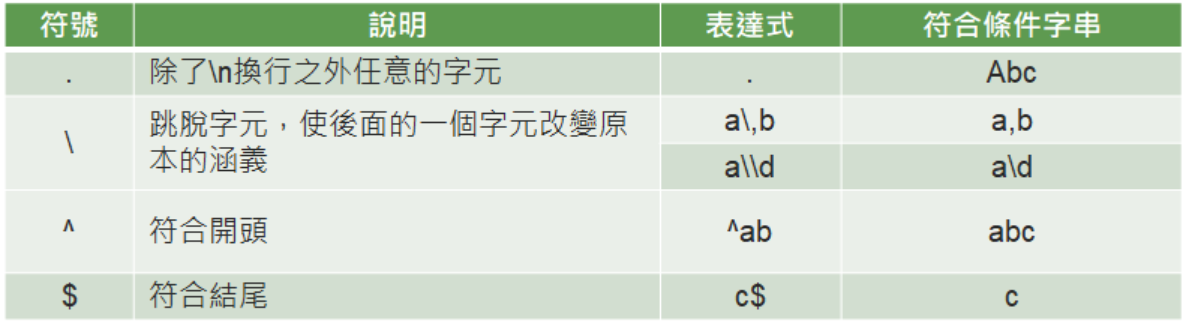
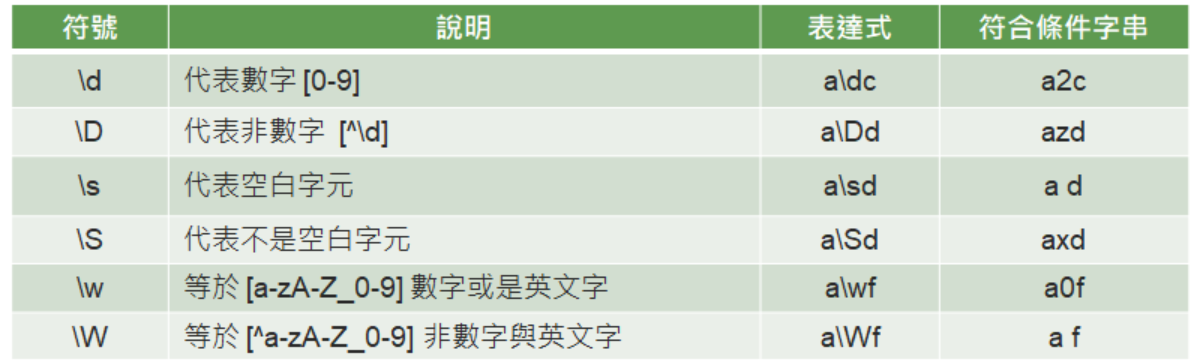

In [1]:
import re
s = "Tim's phone numbers are 12345-41521 and 78963-85214"
match = re.findall(r'\d', s)
if match:
    print(match)

['1', '2', '3', '4', '5', '4', '1', '5', '2', '1', '7', '8', '9', '6', '3', '8', '5', '2', '1', '4']


## 計算字元數
+ 定義字元數
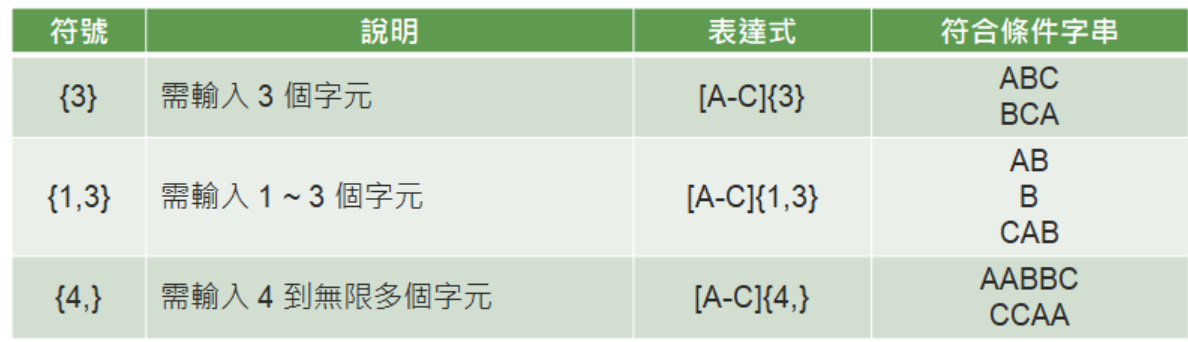

In [2]:
import re
s = "Tim's phone numbers are 12345-41521 and 78963-85214"
match = re.findall(r'\d{5}', s)
if match:
    print(match)


['12345', '41521', '78963', '85214']


## 依據尋找的字元範圍
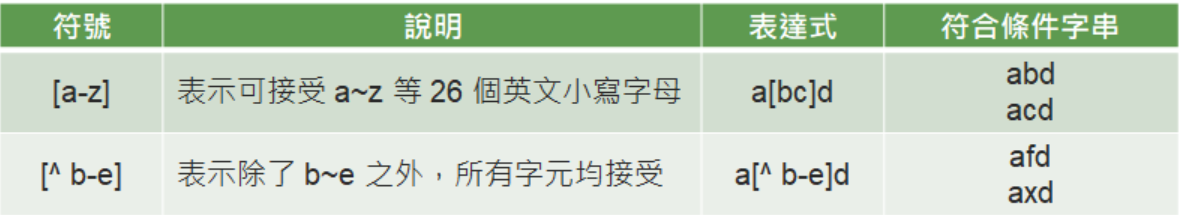

In [6]:
import re
ptn = r"r[au]n " #空格是否會影響? 找到"ran "" r到n中間可以是a或u其中一個 再接一個空白
#ptn = r"r[au]n" # 找到 ran與run r到n中間可以是a或u其中一個
#ptn = r"r[a-u]n" #['ran', 'run', 'rin']r到n中間可以是a b c d e f g h i j h l m n o p q r s t u 之間的任意一個
#ptn = r"r[a-u]{1,3}n" #['ran', 'run', 'rain', 'rin']r到n中間可以是a b c d e f g h i j h l m n o p q r s t u數量為1或3各
print(re.findall(ptn, "dog ran  runs to cat rain rin"))

['ran', 'run', 'rain', 'rin']


In [7]:
import re
string1="1dog  cat2  3rabbit "
print(re.findall(r"[A-Z]",string1))
print(re.findall(r"[a-c]",string1))
print(re.findall(r"[0-9]",string1))
print(re.findall(r"[^a-c]",string1)) #除了a~c之外的

[]
['c', 'a', 'a', 'b', 'b']
['1', '2', '3']
['1', 'd', 'o', 'g', ' ', ' ', 't', '2', ' ', ' ', '3', 'r', 'i', 't', ' ']


## 計算重複數量
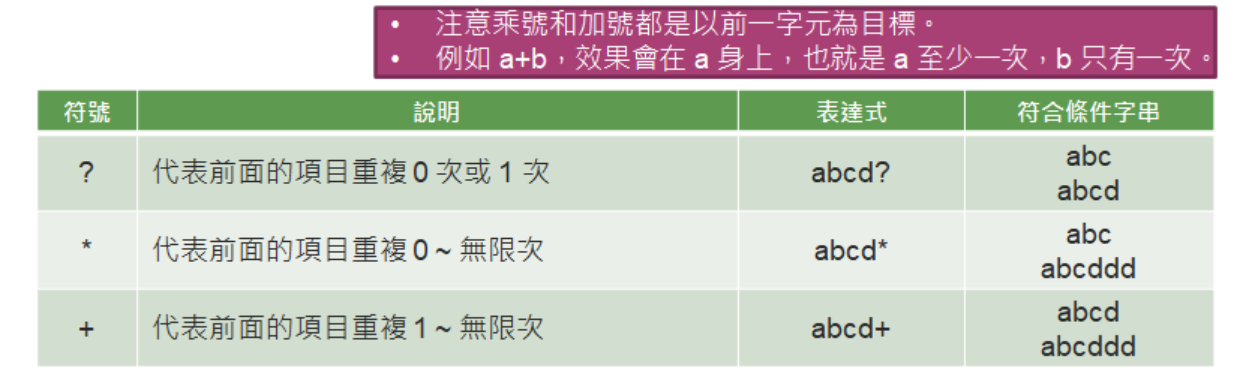

In [8]:
import re
pattern = re.compile(r'\d+')  
result1 = pattern.findall('hello 123456 789')
result2 = pattern.findall('one1two2three3four4', 0, 13)
print(result1  )#['123456', '789']
print(result2  )#['1', '2'] 0~不包含13的區間搜尋數字

['123456', '789']
['1', '2']


In [9]:
import re
str1="abc1d abcdd abc2b abc aaaa"
print(re.findall(r"abcd?", str1))
print(re.findall(r"abcd*",str1))
print(re.findall(r"abc\d+",str1))
print(re.findall(r"[a-c]{3}", str1))#abc任意字母組合必須出現3次
print(re.findall(r"[a-c]{1,4}", str1))#abc任意字母組合必須出現1~4次
print(re.findall(r"[a-c]{4,}",str1))#abc任意字母組合最少4次最多無限

['abc', 'abcd', 'abc', 'abc']
['abc', 'abcdd', 'abc', 'abc']
['abc1', 'abc2']
['abc', 'abc', 'abc', 'abc', 'aaa']
['abc', 'abc', 'abc', 'b', 'abc', 'aaaa']
['aaaa']


In [10]:
import re
string1="C++ Python Java C# Sqlite Django Numpy Pandas "
print(re.findall(r"[p-t]",string1))#p q r s t 

['t', 'q', 't', 'p', 's']


## split 方法
+ split 方法能以比對規則針對字串進行切割後產生 list。
+ split 它的使用形式如下：
+ split(字串,最大分割次數)
   + 若不指定最大分割次數則全部分割

In [13]:
import re
text = 'one, two...ten'
re1=re.split('[,. ]+', text)#碰到,或.或 空白 1次或多次都需要分割
print(re1)
re1=re.split('[,. ]+', text, maxsplit=1)
print(re1)

['one', 'two', 'ten']
['one', 'two...ten']


## sub 方法
+ sub 方法用於替換，它的使用形式如下
  + sub(取代的字串或函數,來源字串,可設定被取代的數量)
+ 可設定被取代的數量若不指定時全部替換。


In [14]:
import re
inputStr = "hello 123 world 456"
replacedStr = re.sub('\d+',"222",inputStr)
print(replacedStr)
replacedStr = re.sub("\d+", "222 ", inputStr,count=1) 
print(replacedStr)

hello 222 world 222
hello 222  world 456


In [15]:
import re
inputStr = "1970,C language,1990,python"
replacedStr = re.sub("\d+", "2018", inputStr)
print(replacedStr)

2018,C language,2018,python


# 切割與合併

## row 的切割與合併
+ row 代表第一維，代表 axis=0，也可說水平的一列一列。
+ 可使用 vsplit 方式進行切割，可指定要切割的數量。
   + 回傳一組list內包含 ndArray
+ 可使用 vstack 方式進行合併。

## column 的切割與合併
+ column 代表第二維，代表 axis=1，也可說垂直的一行一行。
+ 可使用 hsplit 方式進行切割，可指定要切割的數量。
+ 可使用 hstack 方式進行合併。

In [16]:
import numpy as np
a = np.arange(12).reshape(3, 4)
print(a)
print("---------------")
print(np.vsplit(a,3))
print("---------------")
print(np.vsplit(a,3)[1])
print("---------------")
print(type(np.vsplit(a,3)))
print("---------------")
b=np.arange(12,24).reshape(3, 4)
print(b)
print("---------------")
c=np.vstack((a,b))
print(c)
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---------------
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
---------------
[[4 5 6 7]]
---------------
<class 'list'>
---------------
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------


In [19]:
import numpy as np
a = np.arange(12).reshape(3, 4)
print(a)
print("---------------")
print(np.hsplit(a,4))
print("---------------")
print(np.hsplit(a,2))
b=np.arange(12,24).reshape(3, 4)
print(b)
print("---------------")
c=np.hstack((a,b))
print(c)
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---------------
[array([[0],
       [4],
       [8]]), array([[1],
       [5],
       [9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]])]
---------------
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
---------------


## 可選擇行列分合
+ split 代表切割的動作：
  + 若 axis 為 0 代表 row 切割，等同於 vsplit。
  + 若 axis 為 1 代表 column 切割，等同於 hsplit。
  + np.split(a,3,axis=0) #3 代表切割數。
+ concatenate 代表進行合併：
  + 若 axis 為 0 代表 row 合併，等同於 vstack。
  + 若 axis 為 1 代表 column 合併，等同於 hstack。

In [20]:
import numpy as np
a = np.arange(12).reshape(3, 4)
print(a)
print("---------------")
print(np.split(a,3,axis=0))
print("---------------")
print(np.split(a,2,axis=1))
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---------------
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
---------------
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
---------------


In [21]:
import numpy as np
a = np.arange(12).reshape(3, 4)
b = np.arange(12,24).reshape(3, 4)
c = np.concatenate((a,b),axis=0)
print(c)
print("---------------")
c=np.concatenate((a,b),axis=1)
print(c)
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
---------------


## 不等量切割
+ 利用 array_split 方法進行不等量的切割。

In [26]:
import numpy as np
a = np.arange(12).reshape(3,4)
print(a)
print(np.array_split(a,2,axis=0))

print("-------------------")
print(np.array_split(a,3,axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
-------------------
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]])]


## 檔案讀取查詢 作業

In [27]:
import csv
inValue = input("請輸入郵遞區號:")
with open("HW16__Data.csv",'r',encoding="utf-8") as data:
    csvList = csv.reader(data)
    for data in csvList :
        if data[2] == inValue:
           print(data)

請輸入郵遞區號:104
['中山分局', 'Zhongshan Precinct', '104', '臺北市中山區中山北路2段1號', '02 25412491', '302750.6974', '2771704.464']
['中山一派出所', 'Zhongshan First Police Station', '104', '臺北市中山區中山北路1段110號', '02 25519321', '302613.5457', '2771415.78']
['中山二派出所', 'Zhongshan Second Police Station', '104', '臺北市中山區中山北路2段90號', '02 25517771', '302727.2356', '2772263.722']
['圓山派出所', 'Yuanshan Police Staticn', '104', '臺北市中山區中山北路3段62號', '02 25969433', '302834.9838', '2773933.985']
['長春路派出所', 'Changchun Rd. Police Station', '104', '臺北市中山區長春路206號', '02 25062289', '304083.3089', '2771936.628']
['長安東路派出所', 'Changan E. Rd. Police Station', '104', '臺北市中山區長安東路2段165號', '02 27735207', '304542.2421', '2771254.798']
['民權一派出所', 'Minquan First Police Station', '104', '臺北市中山區新生北路2段127之1號', '02 25314672', '303266.0302', '2772517.502']
['建國路派出所', 'Jianguo Police Station', '104', '臺北市中山區民族東路284號', '02 25099774', '304074.2363', '2773416.496']
['大直派出所', 'Dazhi Police Station', '104', '臺北市中山區北安路456號', '02 25332984', '304885.9044', '2774

# 遺失與重複值處理

## 判斷遺失值產生原因
+ 有些資訊是暫時無法讀取。
+ 有些資訊是被遺漏。
+ 有些對象的某些屬性特徵是不存在。
+ 有些資訊被認為不重要。
+ 操作這些資訊的代價太大而被遺棄。

## 遺失值處理
+ 使用 reindexing，我們創建了一個缺失值的 DataFrame。在輸出中，NaN 表示不是數字。
檢查缺失值
+ 為了更容易地檢測缺失值以及避免受到資料類型干擾，Pandas 提供了 isnull( ) 和 notnull( ) 函數。

In [28]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
1.0,2.0,3.5,4
5.5,34,3.4
10,,11.5,8.5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)

      A     B     C    D
0   1.0   2.0   3.5  4.0
1   5.5  34.0   3.4  NaN
2  10.0   NaN  11.5  8.5


## 忽略遺失值
+ 忽略丟棄
  + 如果你直接把具有遺漏值的資料丟掉，那麼很可能你的訓練資料量或是維度會下降。
  + 你在未來預測資料時，也可能會遇到資料不全的狀況。
+ 缺少資料的計算
  + 計算數值資料總和時 NA 將被視為零。
  + 如果數值資料全部是 NA，那麼結果將是 NA。

In [29]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print(df[['A']].sum())
print(df[['B']].sum())
print(df[['A']].mean())
print(df[['B']].mean())# 數量算2筆
print(df[['A']].count())
print(df[['B']].count())
print(df.isnull().sum())

    A     B   C    D
0   2   3.0   4  5.0
1   6  34.0   6  NaN
2  10   NaN  11  8.0
A    18
dtype: int64
B    37.0
dtype: float64
A    6.0
dtype: float64
B    18.5
dtype: float64
A    3
dtype: int64
B    2
dtype: int64
A    0
B    1
C    0
D    1
dtype: int64


## 丟棄遺失值
+ 您可以使用 dropna 方法再搭配 axis 參數方式進行搭配。
+ 默認情況下，預設為 axis = 0，也就是會沿著 Rows 進行，當發現到任何值為 NA 就會整個 Row 刪除。
+ 若加入參數 how=‘all’ 代表整個 Row 資料都是遺失值情況下才可以刪除丟棄。
+ 加入參數 thresh=N 代表刪除包含少於 N 個觀察值的 row。

In [30]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
,,,
3,3,,
,5,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("============")
df1=df.dropna(axis=0)#只要一個Row是Nan就移除
print(df1)
print("============")
df2=df.dropna(axis=1) #因為每一欄都有NaN所以沒資料
print(df2)
print("============")
df3=df.dropna(axis=0,how='all')# 所有都是Nan才移除
print(df3)
print("============")
print(df3.reset_index(drop=True))

      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   NaN   NaN   NaN  NaN
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN
     A    B    C    D
0  2.0  3.0  4.0  5.0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5]
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   3.0   3.0   NaN  NaN
4   NaN   5.0   NaN  NaN


In [31]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("============")
df1=df.dropna(thresh=3) # 每一各row有3各NaN的移除
print(df1)
print("============")
df2=df.dropna(subset=['C','D']) # c跟d欄位都不是NaN的顯示
print(df2)

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
      A    B     C    D   E
0   2.0  3.0   4.0  5.0 NaN
2  10.0  NaN  11.0  8.0 NaN


## 填充遺失值
+ 可使用 fillna 函數進行填充
  + 輸入要填充的數值
    + 補上中位數：建議補上中位數而非平均值，這樣相對來說不會受到極端值的影響。
    + 根據原本的資料分布補上亂數。
+ 以下兩種方式可以向後或者向前進行填充
   + pad/ffill          代表向後填充
   + bfill/backfill   代表向前填充

In [32]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
,,,
3,3,,
,5,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("============")
df1=df.fillna(0)
print(df1)
print("============")
median1=df.median()#中位數
print(median1)
print("============")
df2=df.fillna(median1)
print(df2)

      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   NaN   NaN   NaN  NaN
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  0.0
2  10.0   0.0  11.0  8.0
3   0.0   0.0   0.0  0.0
4   3.0   3.0   0.0  0.0
5   0.0   5.0   0.0  0.0
A    4.5
B    4.0
C    6.0
D    6.5
dtype: float64
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  6.5
2  10.0   4.0  11.0  8.0
3   4.5   4.0   6.0  6.5
4   3.0   3.0   6.0  6.5
5   4.5   5.0   6.0  6.5


In [33]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
,,,
3,3,,
,5,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("========================")
df1=df.fillna(0,limit=1) #限制每一欄只補一個數
print(df1)
print("========================")
median1=df.median()
print(median1)
print("========================")
df2=df.fillna(median1,limit=1)
print(df2)

      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   NaN   NaN   NaN  NaN
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  0.0
2  10.0   0.0  11.0  8.0
3   0.0   NaN   0.0  NaN
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN
A    4.5
B    4.0
C    6.0
D    6.5
dtype: float64
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  6.5
2  10.0   4.0  11.0  8.0
3   4.5   NaN   6.0  NaN
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN


### 以下兩種方式可以向後或者向前進行填充
   + pad/ffill          代表向後填充
   + bfill/backfill   代表向前填充

In [35]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
,,,
3,,,
,5,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("=============")
df1=df.fillna(method='pad') # 如果當前欄位是NaN  向上一筆同欄直到非NaN的值 寫入目前欄位
print(df1)
print("=============")
df2=df.fillna(method='backfill') # 如果當前欄位是NaN  向下一筆同欄直到非NaN的值 寫入目前欄位
print(df2)
print("======pad limit=1=======")
df1=df.fillna(method='pad',limit=1) #因為limit為1 當前欄位是NaN 向上找1筆 寫入目前欄位
print(df1)
print("======backfill limit=1=======")
df2=df.fillna(method='backfill',limit=1)# 因為limit為1 當前欄位是NaN 向下找1筆 寫入目前欄位
print(df2)
print("=============")

      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   NaN   NaN   NaN  NaN
4   3.0   NaN   NaN  NaN
5   NaN   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  5.0
2  10.0  34.0  11.0  8.0
3  10.0  34.0  11.0  8.0
4   3.0  34.0  11.0  8.0
5   3.0   5.0  11.0  8.0
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  8.0
2  10.0   5.0  11.0  8.0
3   3.0   5.0   NaN  NaN
4   3.0   5.0   NaN  NaN
5   NaN   5.0   NaN  NaN
======pad limit=1=======
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  5.0
2  10.0  34.0  11.0  8.0
3  10.0   NaN  11.0  8.0
4   3.0   NaN   NaN  NaN
5   3.0   5.0   NaN  NaN
======backfill limit=1=======
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  8.0
2  10.0   NaN  11.0  8.0
3   3.0   NaN   NaN  NaN
4   3.0   5.0   NaN  NaN
5   NaN   5.0   NaN  NaN


## 重複值偵測
+ 可利用 duplicated( ) 方法檢查 dataframe 內的 row 是否有完整重複值資料。
+ 若 duplicated( ) 方法內加入欄位名稱代表檢查某欄位是否有重複資料。
+ drop_duplicates( ) 方法將會丟棄重複值：
  + 預設保留第一個。
  + 若加入 keep=‘first’ 將得到相同結果。
  + 若加入 keep=‘last’ 將保留最後一個。
  + 若加入 keep=False 代表不保留。
+ 站在 row 的角度，若有多個重複的資料，那 row 也會執行多個重複值的檢查與刪除。
+ 站在 column 角度，若要進行重複值的檢查與刪除，必須告訴他column 名稱，若是兩個欄位以上，請加入 subset=[‘欄位1’,‘欄位2’]。

In [36]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5


### 檢查重複

In [37]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("------0----")
print(df.duplicated()) #因為index 2的row 5 5 5 與 index 1的row 5 5 5 一模一樣所以重複
print("-------1---------")
print(df.duplicated('A')) # 單獨查A欄的數值是否重複
print("-------2---------")
print(df.duplicated('D'))
print("-------3---------")

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
------0----
0    False
1    False
2     True
3    False
dtype: bool
-------1---------
0    False
1    False
2     True
3    False
dtype: bool
-------2---------
0    False
1     True
2     True
3     True
dtype: bool
-------3---------


### 丟棄重複值的資料

In [38]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("==================")
print(df.drop_duplicates())#保留第一個重複的
print("==================")
print(df.drop_duplicates(keep='last')) #保留最後一個重複的
print("==================")
print(df.drop_duplicates(keep=False)) #不保留
print("==================")

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
1   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
2   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
3  13  23  5  5


In [39]:
# import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("======")
print(df.drop_duplicates(subset=['C','D'])) #因為C D 重頭到尾都重複 所以 只留index :0的資料
print("======")
print(df.drop_duplicates(subset=['C','D'],keep='last'))#因為C D 重頭到尾都重複 keep 為 last 所以 只留index :3
print("======")
print(df.drop_duplicates(subset=['C','D'],keep=False))#因為C D 重頭到尾都重複 keep 為 False都不留 所以空
print("======")
print(df.drop_duplicates(subset=['A','D'],keep=False))
print("======")
print(df.drop_duplicates(subset=['B']))

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
   A  B  C  D
0  2  3  5  5
    A   B  C  D
3  13  23  5  5
Empty DataFrame
Columns: [A, B, C, D]
Index: []
    A   B  C  D
0   2   3  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
1   5   5  5  5
3  13  23  5  5


In [40]:
import pandas as pd
data = pd.read_csv('HW17__Data.csv')
for v in data.columns:
    if v != '行業別':
        print(f'{v}平均值為:{data[v].mean():.2f}')
    else:
        print(f'行業筆數:{data[v].count():.0f}')

行業筆數:111
經常性薪資平均值為:27764.80
專業人員-經常性薪資平均值為:33162.01
技術員及助理專業人員-經常性薪資平均值為:28917.55
事務支援人員-經常性薪資平均值為:26588.43
服務及銷售工作人員-經常性薪資平均值為:22083.83
技藝_機械設備操作及組裝人員-經常性薪資平均值為:23405.24
基層技術工及勞力工-經常性薪資平均值為:19570.29


# 資料新增刪除轉換與取代
+ 資料轉換處理包含
  + 資料取代
  + 資料分析後轉換
+ 資料取代
  + 可使用 replace 方式來替換指定的值
+ Column 的索引值名稱變更
  + df=df.rename(columns={'原來名稱':'新的名稱'})  


## 資料分析轉換
+ Series 的 map 方法可以接受一個函數或含有 map 關係的字典型資訊。
+ 使用 map 是一種實現元素轉換以及其他資訊清理工作的方式。 
+ 可以搭配 Series 或 dict、匿名函數與一般函數作業。

In [41]:
import pandas as pd
s1 = pd.Series(range(10))
s2=s1.map(lambda x:x+10)
s3=s1.map(lambda x:x*-1)
print(s1)
print("--------------")
print(s2)
print("--------------")
print(s3)
print("--------------")

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
--------------
0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
--------------
0    0
1   -1
2   -2
3   -3
4   -4
5   -5
6   -6
7   -7
8   -8
9   -9
dtype: int64
--------------


In [42]:
import pandas as pd
x = pd.Series([1,2,3], index=['one', 'two', 'three'])
y = pd.Series(['foo', 'bar', 'baz'], index=[1,2,3])#可以把index當作key
x1=x.map(y) #y的index對上 x的value 決定要換置的數值 在x內 value是1 index:one 在y內value是foo index是1
# y的index跟 x的value對上了 把x的value換成y的value 
z = {1: 'A', 2: 'B', 3: 'C'}
x2=x.map(z) # dict內容 key為1 對上 x的value為1的正好取代 x　的value變為A
print(x)
print("--------------")
print(y)
print("--------------")
print(x1)
print("--------------")
print(x2)
print("--------------")
print(z)
print("--------------")

one      1
two      2
three    3
dtype: int64
--------------
1    foo
2    bar
3    baz
dtype: object
--------------
one      foo
two      bar
three    baz
dtype: object
--------------
one      A
two      B
three    C
dtype: object
--------------
{1: 'A', 2: 'B', 3: 'C'}
--------------


In [46]:
import pandas as pd
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
            'Corned beef','Bacon','pastrami','honey ham','nova lox'],
                  'ounces':[4,3,12,6,7.5,8,3,5,6]})
print(data)
print("=========================")
print(type(data['food']))
print("=========================")
meat_to_animal = {
    'bacon':'pig', 'pulled pork':'pig',
    'pastrami':'cow','corned beef':'cow',
    'honey ham':'pig', 'nova lox':'salmon' }
data['animal'] = data['food'].map(str.lower).map(meat_to_animal) # 建立一組新的animal欄位 將修改後的數值寫入
# 假設有一組需求 須建立food 對映 animal的關係
print("=========================")
print(data)


          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  Corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
<class 'pandas.core.series.Series'>
          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  Corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


In [47]:
import pandas as pd
indexdate = pd.date_range('2018-09-25', periods=10)
print("--------------")
s1 = pd.Series(list(range(10)), index=indexdate)
s2=s1.index.map(lambda x: x.day) # 改變index為day
s3=s1.index.map(lambda x: x.weekday) # 改變index為星期幾 0是周一
s4=s1.map(lambda x: x+10) # 把value + 10
def f(x):
    if x < 5:
        return True
    else:
        return False
s5=s1.map(f)
s6 = pd.Series(list(range(10)), index=indexdate)
print(s1)
print("--------------")
print(s2)
print("--------------")
print(s3)
print("--------------")
print(s4)
print("--------------")
print(s5)
print("--------------")
print(s6)
print("--------------")
s6.index = s2 #將index換成day
print(s6)
print("--------------")

--------------
2018-09-25    0
2018-09-26    1
2018-09-27    2
2018-09-28    3
2018-09-29    4
2018-09-30    5
2018-10-01    6
2018-10-02    7
2018-10-03    8
2018-10-04    9
Freq: D, dtype: int64
--------------
Int64Index([25, 26, 27, 28, 29, 30, 1, 2, 3, 4], dtype='int64')
--------------
Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3], dtype='int64')
--------------
2018-09-25    10
2018-09-26    11
2018-09-27    12
2018-09-28    13
2018-09-29    14
2018-09-30    15
2018-10-01    16
2018-10-02    17
2018-10-03    18
2018-10-04    19
Freq: D, dtype: int64
--------------
2018-09-25     True
2018-09-26     True
2018-09-27     True
2018-09-28     True
2018-09-29     True
2018-09-30    False
2018-10-01    False
2018-10-02    False
2018-10-03    False
2018-10-04    False
Freq: D, dtype: bool
--------------
2018-09-25    0
2018-09-26    1
2018-09-27    2
2018-09-28    3
2018-09-29    4
2018-09-30    5
2018-10-01    6
2018-10-02    7
2018-10-03    8
2018-10-04    9
Freq: D, dtype: int64
-----------

## Apply

In [49]:
import pandas as pd

data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
            'Corned beef','Bacon','pastrami','honey ham','nova lox'],
                  'ounces':[4,3,12,6,7.5,8,3,5,6]})
print(data)
print("=========================")
data['food-ounces']=data.apply(lambda dataf:f"{dataf['food']}-{dataf['ounces']}",axis=1 )
print("=========================")
print(data)

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  Corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
          food  ounces      food-ounces
0        bacon     4.0        bacon-4.0
1  pulled pork     3.0  pulled pork-3.0
2        bacon    12.0       bacon-12.0
3     Pastrami     6.0     Pastrami-6.0
4  Corned beef     7.5  Corned beef-7.5
5        Bacon     8.0        Bacon-8.0
6     pastrami     3.0     pastrami-3.0
7    honey ham     5.0    honey ham-5.0
8     nova lox     6.0     nova lox-6.0


# 分組
+ 可針對資料進行分組，然後對每組資料進行統計分析。
+ 分組運算過程：split → apply → combine
  + 拆解 split：依據規則進行拆解分組。
  + 應用 apply：每個分組運行計算規則處理。
  + 合併 combine：把每個分組的計算結果合併起來。
+ 可針對資料進行分組，然後對每組資料進行統計分析。
+ 分組運算過程：split → apply → combine
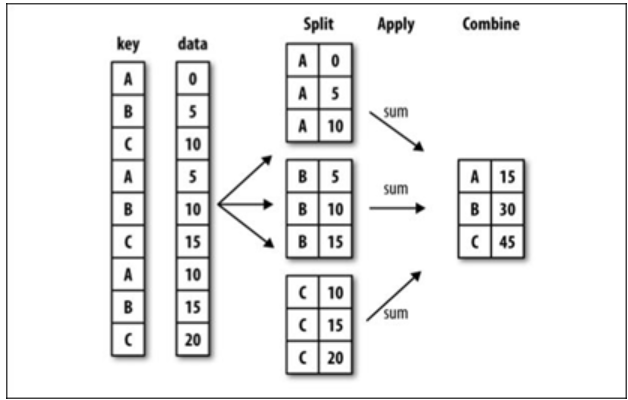
+ 可使用 groupby( ) 進行分組，而這動作並沒有進行實際運算，只是包含分組的資訊。
+ 物體可有多種切割方式：
  + df1.groupby('key')
  + df1.groupby(['key1','key2'])
  + df1.groupby(key,axis=1)

In [50]:
import pandas as pd
import numpy as np
a = {'key1' : ['a', 'b', 'a', 'b', 'a', 'b', 'a', 'a'],
     'key2' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
     'data1': [2,3,4,5,6,7,8,1],
     'data2':[8,1,2,3,5,6,7,6]}
df1 = pd.DataFrame(a)
print(df1)
print("-------------------")

  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
-------------------


### 開始群組

## 分組後的資料
+ 可針對分組後的資料進行分組計算，例如 mean( )。
+ 分組後將會傳回一組 tuple 資料，包含 group_name 與group_data，就可以做後續的運用。
+ get_group( ) 可得到指定的該組資訊。

In [53]:
import pandas025
df2=pandas025.df1
grouped2 = df2.groupby(['key1', 'key2'])
print("================")
print(grouped2.size( ))
print("================")
grouped3 =df2.groupby(['key2', 'key1']) #先用key2 群組 再用key1群組
print(grouped3.mean( )) #求出群組後的均值
print("================")
print(grouped3.mean( ).unstack()) #row 索引轉到colum
print("================")

key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
            data1  data2
key2  key1              
one   a       5.0    7.5
      b       3.0    1.0
three a       1.0    6.0
      b       5.0    3.0
two   a       5.0    3.5
      b       7.0    6.0
      data1      data2     
key1      a    b     a    b
key2                       
one     5.0  3.0   7.5  1.0
three   1.0  5.0   6.0  3.0
two     5.0  7.0   3.5  6.0


## pandas025a的內容

In [54]:
import pandas025
df2=pandas025.df1
print("==========df2=================")
print(df2)
self_def_key = [0, 1, 2, 3, 3, 4, 5, 7]
print("===========================")
print(df2.groupby(self_def_key).size()) #群組自訂的Kye
print("=========key1==================")
print(df2['key1'])
print("==========key2=================")
print(df2['key2'])
print("==========groupby key2 key1=================")
print(df2.groupby([df2['key2'],df2['key1']]).size())
#print(df2.groupby(['key2','key1']).size())print("===========================")
print("============groupby('key1')mean===============")
grouped1 = df2.groupby('key1')
print(grouped1.mean()) #整組Dataframe 都群組key1 求平均值
print("===========================")
grouped2 = df2['data1'].groupby(df2['key1']) #針對data1 groupby key1
print(grouped2.mean())
print("===========================")
print(grouped2.mean()[1])

==========df2=================
  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
0    1
1    1
2    1
3    2
4    1
5    1
7    1
dtype: int64
=========key1==================
0    a
1    b
2    a
3    b
4    a
5    b
6    a
7    a
Name: key1, dtype: object
==========key2=================
0      one
1      one
2      two
3    three
4      two
5      two
6      one
7    three
Name: key2, dtype: object
==========groupby key2 key1=================
key2   key1
one    a       2
       b       1
three  a       1
       b       1
two    a       2
       b       1
dtype: int64
============groupby('key1')mean===============
      data1     data2
key1                 
a       4.2  5.600000
b       5.0  3.333333
key1
a    4.2
b    5.0
Name: data1, dtype: float64
5.0


In [55]:
import pandas025a
print("-------start--------")
#
"""
DataFrameGroupBy 轉成list後可清楚了他是一組list包含了tuple 
tuple內包含group_name 與 group_data
"""
print(list(pandas025a.grouped1)) 
print("---------------")
for group_name, group_data in pandas025a.grouped1: #透過以下方式可分別取出群組資料 grouped1使用key1做群組
    print("group_name:",group_name)
    print(group_data)
print("---------------")    
for group_name, group_data in pandas025a.grouped2: ## data1  使用key做群組
    print(group_name)
    print(group_data)
print("---------------")      

0    1
1    1
2    1
3    2
4    1
5    1
7    1
dtype: int64
key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
      data1     data2
key1                 
a       4.2  5.600000
b       5.0  3.333333
key1
a    4.2
b    5.0
Name: data1, dtype: float64
-------start--------
[('a',   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6), ('b',   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6)]
---------------
group_name: a
  key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6
group_name: b
  key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6
---------------
a
0    2
2    